In [1]:
from utils.nn.conv import LeNet
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.datasets import mnist
from keras import backend as k
import matplotlib.pyplot as plt
import numpy as np

2022-09-12 14:37:59.931277: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-12 14:37:59.931296: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
print('[INFO] accessing MNIST....')
(trainX,trainY), (testX,testY) = mnist.load_data()

[INFO] accessing MNIST....


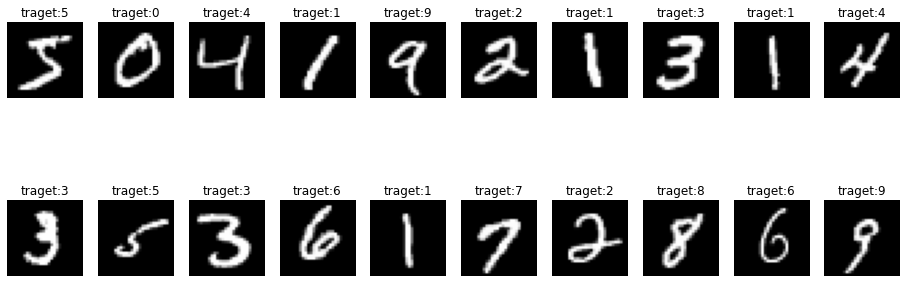

In [3]:
fig, axes = plt.subplots(2,10, figsize=(16,6))
for i in range(20):
    y = int(i/10)
    x = int(i%10)
    axes[y,x].imshow(trainX[i], cmap='gray')
    axes[y,x].axis('off')
    axes[y,x].set_title(f'traget:{trainY[i]}')

In [4]:
trainX = trainX/255.0
testX  = testX/255.0
le = LabelBinarizer()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)

In [5]:
print('[INFO] compiling our model')
opt = SGD(lr=0.01)
model = LeNet.build(28,28,1,10)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
print('[INFO] training network...')
H = model.fit(trainX,trainY, validation_data=(testX,testY),
             batch_size=128, epochs=20, verbose=1)

[INFO] compiling our model
[INFO] training network...


/home/shervin/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
2022-09-12 14:38:05.270833: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-12 14:38:05.270881: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-12 14:38:05.270908: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (shervin): /proc/driver/nvidia/version does not exist
2022-09-12 14:38:05.271255: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operat

Epoch 1/20
469/469 [==============================] - 56s 117ms/step - loss: 1.0190 - accuracy: 0.7221 - val_loss: 0.3153 - val_accuracy: 0.9073
Epoch 2/20
469/469 [==============================] - 56s 119ms/step - loss: 0.2694 - accuracy: 0.9197 - val_loss: 0.2219 - val_accuracy: 0.9289
Epoch 3/20
469/469 [==============================] - 59s 126ms/step - loss: 0.1891 - accuracy: 0.9432 - val_loss: 0.1537 - val_accuracy: 0.9520
Epoch 4/20
469/469 [==============================] - 55s 118ms/step - loss: 0.1474 - accuracy: 0.9558 - val_loss: 0.1230 - val_accuracy: 0.9621
Epoch 5/20
469/469 [==============================] - 58s 123ms/step - loss: 0.1214 - accuracy: 0.9645 - val_loss: 0.1029 - val_accuracy: 0.9681
Epoch 6/20
469/469 [==============================] - 57s 122ms/step - loss: 0.1036 - accuracy: 0.9685 - val_loss: 0.0955 - val_accuracy: 0.9699
Epoch 7/20
469/469 [==============================] - 59s 126ms/step - loss: 0.0914 - accuracy: 0.9728 - val_loss: 0.0755 - val_ac

In [8]:
model.save('LeNet.h5')

[INFO] evaluating network...
79/79 [==============================] - 10s 131ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



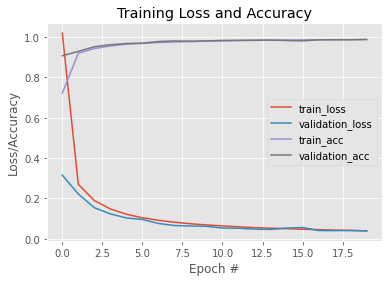

In [10]:
print('[INFO] evaluating network...')
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1),
                           target_names = [str(x) for x in le.classes_]))
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,20), H.history['loss'], label='train_loss')
plt.plot(np.arange(0,20), H.history['val_loss'], label='validation_loss')
plt.plot(np.arange(0,20), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0,20), H.history['val_accuracy'], label='validation_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [11]:
import cv2

(-0.5, 27.5, 27.5, -0.5)

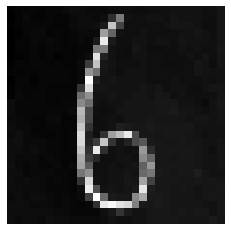

In [99]:
img = cv2.imread('test2.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (28,28),interpolation=cv2.INTER_AREA)
img = 255 - img
plt.imshow(img,cmap='gray')
plt.axis('off')

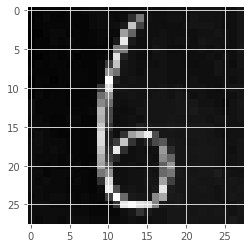

In [100]:
img = img/255.0
plt.imshow(img,cmap='gray')
img = img.reshape((1,28,28))

In [105]:
model.predict(img).argmax(axis=1)

1/1 [==============================] - 0s 75ms/step


array([8])